The idea behind a predictive modeling task is to use a learning algorithm ($\mathcal{A}$) which will take in the available data and gives us an estimate of the function from which this data is sampled. Then this estimated function can be used to make prediction for inputs for which output is not known.

Let the univariate data given to us be of form
$$\mathcal{D} = \{(x_i, y_i)\}_{i=0}^{N}$$

where $x_i \in \mathbb{R} \text{ and } y_i \in \mathbb{R}$. This can also be extended to multivariate setting like
$$\mathcal{D} = \{(\mathbf{x}_i, y_i)\}_{i=0}^{N}$$

where $\mathbf{x}_i \in \mathbb{R}^d$.


If the function from which this data is sampled is $\mathcal{f}(x)$ (such that $\mathcal{f} : \mathbb{R}^d \rightarrow \mathbb{R}$), the predictive modeling task can be defined as,

$$\mathcal{A}(\mathcal{D}) \rightarrow \mathcal{\hat{f}}(x)$$

## Bias-Variance Trade-off

For the purpose of this article, we will focus only on the regression in a univariate setting. If the data avaiable with us is of form
$$\mathcal{D} = \{(x_i, y_i)\}_{i=0}^{N}$$

For a regression task, it is generally assumed that
$$y = \mathcal{f}(x) \text{ + } \epsilon$$

where,

- $\mathcal{f}(x)$ is a true function.
- $\epsilon$ is noise in the data such that $\epsilon_i \sim \mathcal{N}(0, \sigma)$

And the goal is for a point $x_t$, ($x_t \notin \mathcal{D}$), predict $y_t$.

Now that we have defined our regression task, we need to know performance of our estimated function ($\mathcal{\hat{f}}(x)$). For this let us calculated $\textbf{expected prediction error}$ at some point $x_0$
$${EPE}(x_0) = \mathbb{E}[(y-\hat{f}(x_0))^2]$$

For simplicity of the notation, let $f = f(x_0)$ and $\hat{f} = \hat{f}(x_0)$ also let $\overline{f} = \mathbb{E}[\hat{f}]$ Using these we can re-write the equation for EPE and start expanding it.

Few things to remember:

- $Var[X] = \mathbb{E}[X-\mathbb{E}[X]]^2$
- $Var[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2$
- $\mathbb{E}[\epsilon] = 0$
- $Var[\epsilon] = \sigma^2$


\begin{align}
{EPE}(x_0) & = \mathbb{E}[(y-\hat{f})^2] \\
 & = \mathbb{E}[(y-\overline{f}+\overline{f}-\hat{f})^2] \\
 & = \mathbb{E}[(y-\overline{f})^2 + (\overline{f}-\hat{f})^2 + 2(y-\overline{f})(f-\hat{f})] \\
 & = \mathbb{E}[(y-\overline{f})^2 ] + \mathbb{E}[(\overline{f}-\hat{f})^2] + 2\mathbb{E}[(y-\overline{f})(\overline{f}-\hat{f})] \\
 & = \mathbb{E}[(f+\epsilon-\overline{f})^2] + \mathbb{E}[(\overline{f}-\hat{f})^2] + 2\mathbb{E}[\overline{f}y-\hat{f}y-\overline{f}^2+\overline{f}\hat{f}] \\
 & = \mathrm{I} + \mathrm{II} + \mathrm{III}
\end{align}

Expanding these three terms individually

\begin{align}
\mathrm{I} & = \mathbb{E}[(f+\epsilon-\overline{f})^2] \\
    & = \mathbb{E}[(f-\overline{f})^2 + \epsilon^2 + 2\epsilon(f-\overline{f})] \\
    & = \mathbb{E}[(f-\overline{f})^2] + \mathbb{E}[\epsilon^2 ]+ 2\mathbb{E}[\epsilon(f-\overline{f})] \\
    & = \mathbb{E}[(f-\overline{f})^2] + \mathbb{E}[\epsilon^2 ]+ 2\mathbb{E}[\epsilon]\mathbb{E}[(f-\overline{f})] \\
    & = (f-\overline{f})^2 + Var[\epsilon] + \mathbb{E}[\epsilon]^2 + 0 \\
    & = (f-\overline{f})^2 + \sigma^2 + 0 \\
    & = (f-\mathbb{E}[\hat{f}])^2 + \sigma^2 \\
    & = Bias[\hat{f}]^2 + \sigma_\epsilon^2 \\
    \\
\mathrm{II} & = \mathbb{E}[(\overline{f}-\hat{f})^2] \\
    & = Var[\hat{f}] \\
    \\
\mathrm{III} & = 2\mathbb{E}[\overline{f}y-\hat{f}y-\overline{f}^2+\overline{f}\hat{f}] \\
    & = 2\mathbb{E}[\overline{f}(f+\epsilon)-\hat{f}(f+\epsilon)-\overline{f}^2+\overline{f}\hat{f}]] \\
    & = 2\mathbb{E}[\overline{f}f+\epsilon\overline{f}-\hat{f}f+\epsilon\hat{f}-\overline{f}^2+\overline{f}\hat{f}]] \\
    & = 2(\mathbb{E}[\overline{f}f]+\mathbb{E}[\epsilon\overline{f}]-\mathbb{E}[\hat{f}f]+\mathbb{E}[\epsilon\hat{f}]-\mathbb{E}[\overline{f}^2]+\mathbb{E}[\overline{f}\hat{f}]) \\
    & = 2\overline{f}f+2\overline{f}\mathbb{E}[\epsilon]-2f\mathbb{E}[\hat{f}]+2\mathbb{E}[\epsilon]\mathbb{E}[\hat{f}]-2\overline{f}^2+2\overline{f}\mathbb{E}[\hat{f}] \\
    & = 2\overline{f}f+0-2\overline{f}f+0-2\overline{f}^2+2\overline{f}\overline{f} \\
    & = 2\overline{f}f-2\overline{f}f-2\overline{f}^2+2\overline{f}^2 \\
    & = 0
\end{align}

substituting $\mathrm{I}$, $\mathrm{II}$ and $\mathrm{III}$ in EPE equation we get

\begin{align}
{EPE}(x_0) & = \sigma_\epsilon^2 + Bias[\hat{f}(x_0)]^2 + Var[\hat{f}(x_0)]
\end{align}

From above equation, we can see that **expected prediction error** is decomposed into three parts:

- Irreducible error ($\sigma_\epsilon^2$): This error is inherent noise in the system which is independent of input and cannot be reduced.
- Bias error ($Bias[\hat{f}]^2$): This is the squared difference between $\mathbb{E}[\hat{f}(x_0)]$ and the true function value at $x_0$.
- Variance error ($Var[\hat{f}]$): This is error arise due to $Var[\hat{f}(x_0)]$.

If we want our learning algorithm to perform optimally (i.e. provide best estimate $\hat{f}(x)$, **expected prediction error** needs to be minimised. Since EPE is comprised of 3 components, minimising EPE can be seen as multi-objective minimising problem. Out of these three sources of errors, ee don't have any control over irreducible error but the bias and variance errors can be controlled using **hyper-parameters** of the learning algorithm. Further, reducing one of these two sources error tends to increase another. Therefore, we can minimise EPE only by minimising errors due to both bias and variance. Hence the term **Bias-Variance Trade-off**.

## Computational and Visual example

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from mlxtend.evaluate import bias_variance_decomp

In [3]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [4]:
start = 0
end = 6.25
step = 0.01
x_true = np.arange(start, end, step)

In [5]:
f = lambda x: 0.01*(2**x)*np.sin(np.exp(x-4))

In [6]:
np.random.seed(42)
x = np.random.uniform(start, end, size=100)
err = np.random.normal(loc=0, scale=0.2, size=len(x))
y = f(x) + err

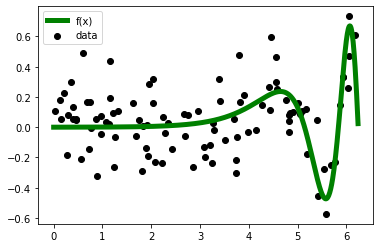

In [7]:
plt.plot(x_true, f(x_true), c='g', lw=5, label='f(x)')
plt.scatter(x, y, c='k', label='data')
plt.legend()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x.reshape((len(x), 1)), y, test_size=0.20, random_state=42)

In [9]:
models = {
    'DecisionTree': DecisionTreeRegressor,
#     'RandomForest': RandomForestRegressor,
    'kNN': KNeighborsRegressor,
    'SVM': SVR
}

In [10]:
def get_prediction(reg, reps=100):
    _ = reg.fit(x.reshape(len(x), 1),y)
    y_hat = reg.predict(x_true.reshape(len(x_true), 1))
    
    predictions = []
    for _ in range(reps):
        resampling_idx = np.random.choice(range(len(x)), size=len(x), replace=True)
        x_resampled = x[resampling_idx]
        y_resampled = y[resampling_idx]
        _ = reg.fit(x_resampled.reshape(len(x_resampled), 1), y_resampled)
        y_hat = reg.predict(x_true.reshape(len(x_true), 1)).tolist()
        predictions.append(y_hat)
    return np.array(predictions)

In [11]:
def test(preds, bias_t, var_t, reg):
    predictions, bias_total, var_total = preds, bias_t, var_t
    print(reg)
    print("--------------------------------------------")
    @interact
    def plot_graphs(x_0 = (start, end, step)):
    #     x_0 = 5.06
        nonlocal predictions, bias_total, var_total
        x_0_idx = np.argwhere(np.round(x_true, 2)==x_0)[0,0]
        y_hat_at_x_0 = predictions[:, x_0_idx]
        avg_y_hat_at_x_0 = np.mean(y_hat_at_x_0)
        epe = np.mean((f(x_0) - y_hat_at_x_0)**2)
        bias = (f(x_0) - avg_y_hat_at_x_0)**2
        var = np.mean((avg_y_hat_at_x_0 - y_hat_at_x_0)**2)
        ir_err = epe - bias - var

        fig = plt.figure(figsize=(15,10), constrained_layout=True)

        gs = GridSpec(3, 2, figure=fig)

        ax1 = fig.add_subplot(gs[0, 0])
        ax1.plot(x_true, f(x_true), c='g', lw=3, label='f(x)')
        ax1.plot(x_true, predictions[0], c='b', lw=0.5, label='y_hat')
        for y_hat in predictions[1:]:
            ax1.plot(x_true, y_hat, c='b', lw=0.5, alpha= 0.2)
        y_min, y_max = ax1.get_ylim()
        ax1.vlines(x_0, y_min, y_max, colors='grey', linestyles='dashed', label='$x_0$')
        ax1.legend(loc='upper left', fontsize=15)
        ax1.set_title("True function vs prediction sample", fontdict={'fontsize': 15})

        # identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
        ax2 = fig.add_subplot(gs[0, 1])
        sns.kdeplot(y_hat_at_x_0, fill=True, color='grey', alpha=.5)
        y_min, y_max = ax2.get_ylim()
        ax2.vlines(avg_y_hat_at_x_0, y_min, y_max, colors='red', linestyles='dashed', label='$\hat{f}(x)$')
        ax2.vlines(f(x_0), y_min, y_max, colors='green', linestyles='dashed', label='$f(x)$')
        ax2.legend(loc='upper right', fontsize=15)
        ax2.set_title("Distribution of sampled prediction at $x_0$", fontdict={'fontsize': 15})

        ax3 = fig.add_subplot(gs[1, :])
        ax3.barh('Error', ir_err, color='grey', height=0.02, label='Irreducible error')
        ax3.barh('Error', bias, left=ir_err, color='red', height=0.02, label='Bias')
        ax3.barh('Error', var, left=bias, color='orange', height=0.02, label='Variance')
        # ax3.set_xlim(0, 0.3)
        ax3.legend(loc='upper right', fontsize=15)
        ax3.set_title("Different error component decomposition at $x_0$", fontdict={'fontsize': 15})

        ax4 = fig.add_subplot(gs[2, :])
        ax4.barh('Error', bias_total, color='red', height=0.02, label='Bias')
        ax4.barh('Error', var_total, left=bias_total, color='orange', height=0.02, label='Variance')
        ax4.set_xlim(0, 0.1)
        ax4.legend(loc='upper right', fontsize=15)
        ax4.set_title("Different error component decomposition for test data", fontdict={'fontsize': 15})

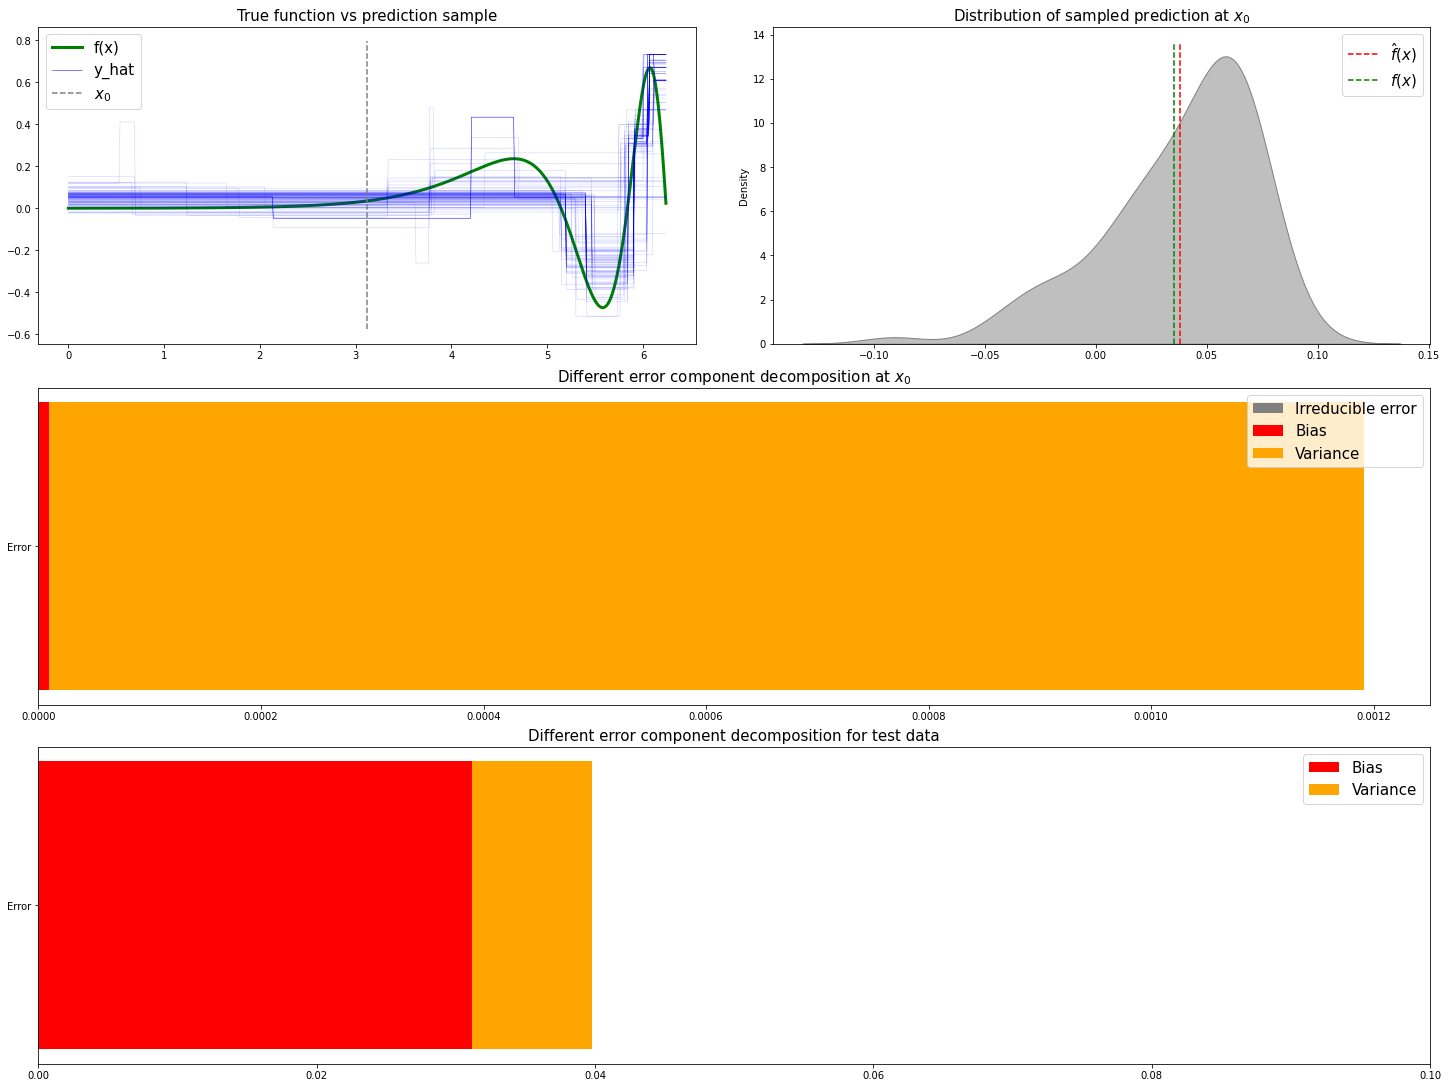

interactive(children=(FloatSlider(value=3.12, description='x_0', max=6.25, step=0.01), Output()), _dom_classes…

interactive(children=(Dropdown(description='max_depth', options=(2, 3, 4, 5, 50), value=2), Dropdown(descripti…

interactive(children=(Dropdown(description='model', options=('DecisionTree', 'kNN', 'SVM'), value='DecisionTre…

In [12]:
@interact
def select_regressor(model = models.keys()):
    print("--------------------------------------------")
    if model == 'DecisionTree':
        @interact
        def select_params(max_depth=[2,3,4,5,50], max_features=["auto", "sqrt", "log2"]):
            reg = DecisionTreeRegressor(max_depth=max_depth, max_features=max_features, random_state=42)
            predictions = get_prediction(reg)
            _, bias_total, var_total = bias_variance_decomp(reg, X_train, y_train, X_test, y_test, loss='mse',
                                                        num_rounds=100, random_seed=42)
            test(predictions, bias_total, var_total, reg)
#     elif model == 'RandomForest':
#         @interact
#         def select_params(n_estimators=[10, 50, 100, 200, 300, 500], max_depth=[2,3, 5,10,15]):
#             reg = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
#             predictions = get_prediction(reg)
#             _, bias_total, var_total = bias_variance_decomp(reg, X_train, y_train, X_test, y_test, loss='mse',
#                                                         num_rounds=100, random_seed=42)
#             test(predictions, bias_total, var_total, reg)
    elif model == 'SVM':
        @interact
        def select_params(kernel=['rbf', 'poly', 'linear'], degree=[2,3,4], gamma=['scale', 'auto', 0.01, 0.1, 1, 10],
                          coef0=[1,2,3], C=[0.1, 1, 10, 100]):
            reg = SVR(kernel=kernel, degree=degree, gamma=gamma, coef0=coef0, C=C)
            predictions = get_prediction(reg)
            _, bias_total, var_total = bias_variance_decomp(reg, X_train, y_train, X_test, y_test, loss='mse',
                                                        num_rounds=100, random_seed=42)
            test(predictions, bias_total, var_total, reg)
    elif model == 'kNN':
        @interact
        def select_params(n_neighbors=[1,3,4,5,10,75], weights=['uniform', 'distance'],
                          metric=['euclidean', 'manhattan']):
            reg = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, metric=metric)
            predictions = get_prediction(reg)
            _, bias_total, var_total = bias_variance_decomp(reg, X_train, y_train, X_test, y_test, loss='mse',
                                                        num_rounds=100, random_seed=42)
            test(predictions, bias_total, var_total, reg)